In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
# Series对象是一个pandas数据结构。与列表类似
s = pd.Series([1,3,5,np.nan,6,8])
print(s.name)
s.name = 'aaa'

None


In [4]:
index = ['MIT', 'UCL']
s1 = pd.Series([95.3, 94.6],index=index)

In [5]:
s2=pd.Categorical(["test","train","test","train"])
s2

[test, train, test, train]
Categories (2, object): [test, train]

In [6]:
# Index也是一个pandas数据结构。将其视为一个列表。create time series index
pd.date_range('2010-01-11','2012-02-12')
dates = pd.date_range('20130101', periods=4, freq="D")
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04'], dtype='datetime64[ns]', freq='D')

In [7]:
# DataFrame是pandas的基础数据结构
df = pd.DataFrame(np.random.randn(4,5), index=dates, columns=list('ABCDE'))
df

,A,B,C,D,E
2013-01-01,-1.125032,0.288054,-0.470245,2.773436,0.099170
2013-01-02,-1.427619,-1.205463,0.067083,1.819289,-0.703470
2013-01-03,-0.177092,-2.145521,1.411874,-0.317464,-1.086351
2013-01-04,-0.858015,0.343563,2.808928,1.188268,-0.152479


In [8]:
df3 = pd.DataFrame(data=[[1,2],[3,4]],columns=[5,6],index=['a','b'])
df3

,5,6
a,1,2
b,3,4


In [9]:
df2 = pd.DataFrame({'A' : 1.,
                    'B' : pd.Timestamp('20130102'),
                    'C' : pd.Series(1,index=list(range(4)),dtype='float32'),
                    'D' : np.array([None, 2,3, np.nan]),
                    'D2': [5,6,7,8],
                    'E' : pd.Categorical(["test","train","test","train"]),
                    'F' : 'foo' })
df2

,A,B,C,D,D2,E,F
0,1.0,2013-01-02,1.0,None,5,test,foo
1,1.0,2013-01-02,1.0,2,6,train,foo
2,1.0,2013-01-02,1.0,3,7,test,foo
3,1.0,2013-01-02,1.0,NaN,8,train,foo


#### create from file

In [59]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m')
data = pd.read_csv('https://www.analyticsvidhya.com/wp-content/uploads/2016/02/AirPassengers.csv', parse_dates=['Month'], index_col='Month',date_parser=dateparse)

HTTPError: HTTP Error 403: Forbidden

In [17]:
ts = data['#Passengers']

In [25]:
print(ts['1949-01-01'])
from datetime import datetime
print(ts[datetime(1949,1,1)])

112
112


In [30]:
#1. Specify the entire range:
print(ts['1949-01-01':'1949-05-01'])
#2. Use ':' if one of the indices is at ends:
print(ts[:'1949-05-01'])
ts['1949']


Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
Name: #Passengers, dtype: int64
Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
Name: #Passengers, dtype: int64


Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
1949-06-01    135
1949-07-01    148
1949-08-01    148
1949-09-01    136
1949-10-01    119
1949-11-01    104
1949-12-01    118
Name: #Passengers, dtype: int64

In [60]:
# Load 网盟 sheet of excel file wangmeng.xlsx
df_xlsx=pd.read_excel("./wangmeng.xlsx", "网盟")

In [62]:
# Load Data from text file having tab ‘\t’ delimeter print df
df_txt=pd.read_csv('E:/Test.txt', sep='\t')

FileNotFoundError: File b'E:/Test.txt' does not exist

In [ ]:
#save to csv
#df_txt.to_csv("my_solution_one.csv", index_label = ["PassengerId"])

In [10]:
print(df2.info())
print(df2.shape)
df2.dtypes

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4 entries, 0 to 3
Data columns (total 7 columns):
A     4 non-null float64
B     4 non-null datetime64[ns]
C     4 non-null float32
D     2 non-null object
D2    4 non-null int64
E     4 non-null category
F     4 non-null object
dtypes: category(1), datetime64[ns](1), float32(1), float64(1), int64(1), object(2)
memory usage: 308.0+ bytes
None
(4, 7)


A            float64
B     datetime64[ns]
C            float32
D             object
D2             int64
E           category
F             object
dtype: object

In [11]:
print(df2.index)
df2.columns

Int64Index([0, 1, 2, 3], dtype='int64')


Index(['A', 'B', 'C', 'D', 'D2', 'E', 'F'], dtype='object')

In [12]:
print(df2.columns[0])
print(df2.E)
print(df2.values)

A
0     test
1    train
2     test
3    train
Name: E, dtype: category
Categories (2, object): [test, train]
[[1.0 Timestamp('2013-01-02 00:00:00') 1.0 None 5 'test' 'foo']
 [1.0 Timestamp('2013-01-02 00:00:00') 1.0 2 6 'train' 'foo']
 [1.0 Timestamp('2013-01-02 00:00:00') 1.0 3 7 'test' 'foo']
 [1.0 Timestamp('2013-01-02 00:00:00') 1.0 nan 8 'train' 'foo']]


In [13]:
#set columns
df3.columns=['a','b']
df3

,a,b
a,1,2
b,3,4


In [14]:
df3=df3.rename(columns = {'a':'a1'})
df3

,a1,b
a,1,2
b,3,4


In [15]:
df2.head(2)
df2.tail(1)

,A,B,C,D,D2,E,F
3,1.0,2013-01-02,1.0,NaN,8,train,foo


#### accessing

In [16]:
# df.A is same
df['A']
df[['A','C']]

,A,C
2013-01-01,-1.073110,-1.033104
2013-01-02,0.934014,-0.736139
2013-01-03,-1.907116,-1.620954
2013-01-04,0.300370,-1.040376


In [17]:
df.loc[dates[0]]

A   -1.073110
B   -0.020399
C   -1.033104
D   -0.435124
E   -1.408255
Name: 2013-01-01 00:00:00, dtype: float64

In [18]:
print(s1.loc['MIT':'UCL'])
# df.B == df.loc[:,'B']
df.loc[:,['B','C']]

MIT    95.3
UCL    94.6
dtype: float64


,B,C
2013-01-01,-0.020399,-1.033104
2013-01-02,-0.400317,-0.736139
2013-01-03,0.381831,-1.620954
2013-01-04,0.396873,-1.040376


In [19]:
df.loc[dates[0]:dates[2],['A','C']]

,A,C
2013-01-01,-1.073110,-1.033104
2013-01-02,0.934014,-0.736139
2013-01-03,-1.907116,-1.620954


In [22]:
print(s.iloc[1])
print(s.iloc[-4:0:-1])
print(df.iloc[3])
df.iloc[0:2, 1]

3.0
2    5.0
1    3.0
Name: aaa, dtype: float64
A    0.300370
B    0.396873
C   -1.040376
D   -0.233579
E   -0.536874
Name: 2013-01-04 00:00:00, dtype: float64


2013-01-01   -0.020399
2013-01-02   -0.400317
Freq: D, Name: B, dtype: float64

In [23]:
# get scalar faster than loc
# set df.at[] = 1
df.at[dates[0],'A']
df.iat[0,1]

-0.020398849204933431

In [24]:
s1>95

MIT     True
UCL    False
dtype: bool

In [25]:
s1.loc[s1>95]

MIT    95.3
dtype: float64

In [26]:
# pandas use & | ~
df[(df['A']>0) & (df['C']>0)]

,A,B,C,D,E


In [27]:
df[df>0]

,A,B,C,D,E
2013-01-01,NaN,NaN,NaN,NaN,NaN
2013-01-02,0.934014,NaN,NaN,NaN,NaN
2013-01-03,NaN,0.381831,NaN,NaN,NaN
2013-01-04,0.300370,0.396873,NaN,NaN,NaN


In [28]:
df[df['A'].isin([0.123])]

,A,B,C,D,E


In [29]:
print(s.isnull())
# isna() == isnull()
df['D'].isna()
pd.isna(df)

0    False
1    False
2    False
3     True
4    False
5    False
Name: aaa, dtype: bool


,A,B,C,D,E
2013-01-01,False,False,False,False,False
2013-01-02,False,False,False,False,False
2013-01-03,False,False,False,False,False
2013-01-04,False,False,False,False,False


In [30]:
df['D'].isna()

2013-01-01    False
2013-01-02    False
2013-01-03    False
2013-01-04    False
Freq: D, Name: D, dtype: bool

In [31]:
df['F'] = df.A + df.B

In [32]:
s_1 =  pd.Series([5.3, 4.6, 1, 3],index=dates)
df.loc[:, 'G'] = s_1
df.head(1)

,A,B,C,D,E,F,G
2013-01-01,-1.07311,-0.020399,-1.033104,-0.435124,-1.408255,-1.093509,5.3


In [33]:
df = df.drop('G', axis=1)
df.head(1)

,A,B,C,D,E,F
2013-01-01,-1.07311,-0.020399,-1.033104,-0.435124,-1.408255,-1.093509


In [34]:
df_1 = df.copy()
df_2 = pd.concat([df, df_1], axis=1)
df_2.head(1)

,A,B,C,D,E,F,A,B,C,D,E,F
2013-01-01,-1.07311,-0.020399,-1.033104,-0.435124,-1.408255,-1.093509,-1.07311,-0.020399,-1.033104,-0.435124,-1.408255,-1.093509


In [36]:
s.fillna(4)
df2_filled = df2.fillna('test') # ?????
#df2_filled.head(1)
df2_filled

,A,B,C,D,D2,E,F
0,1.0,2013-01-02,1.0,test,5,test,foo
1,1.0,2013-01-02,1.0,2,6,train,foo
2,1.0,2013-01-02,1.0,3,7,test,foo
3,1.0,2013-01-02,1.0,test,8,train,foo


In [37]:
s.fillna(method='bfill')
df2_filled = df2.fillna(method='bfill')
df2_filled

,A,B,C,D,D2,E,F
0,1.0,2013-01-02,1.0,2.0,5,test,foo
1,1.0,2013-01-02,1.0,2.0,6,train,foo
2,1.0,2013-01-02,1.0,3.0,7,test,foo
3,1.0,2013-01-02,1.0,NaN,8,train,foo


In [38]:
s.dropna()
df2_droped = df2.dropna()
df2_droped

,A,B,C,D,D2,E,F
1,1.0,2013-01-02,1.0,2,6,train,foo
2,1.0,2013-01-02,1.0,3,7,test,foo


In [12]:
#read_csv params [,index_col='col'|0] [, parse_dates=True] [, usecols=['cols']] [, na_values=['nan']] ,skiprows=1
#df = pd.read_csv(url) read csv from url
df = pd.read_csv("./loan_train.csv")
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m')
#data = pd.read_csv('AirPassengers.csv', parse_dates='Month', index_col='Month',date_parser=dateparse)
df.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y


In [45]:
#transform
df.T

,2013-01-01 00:00:00,2013-01-02 00:00:00,2013-01-03 00:00:00,2013-01-04 00:00:00
A,-1.073110,0.934014,-1.907116,0.300370
B,-0.020399,-0.400317,0.381831,0.396873
C,-1.033104,-0.736139,-1.620954,-1.040376
D,-0.435124,-1.604896,-0.699720,-0.233579
E,-1.408255,-0.323181,-1.918792,-0.536874
F,-1.093509,0.533697,-1.525285,0.697243


In [48]:
df.sort_index(ascending=False)

,A,B,C,D,E,F
2013-01-04,0.300370,0.396873,-1.040376,-0.233579,-0.536874,0.697243
2013-01-03,-1.907116,0.381831,-1.620954,-0.699720,-1.918792,-1.525285
2013-01-02,0.934014,-0.400317,-0.736139,-1.604896,-0.323181,0.533697
2013-01-01,-1.073110,-0.020399,-1.033104,-0.435124,-1.408255,-1.093509


In [50]:
df.sort_values(by='B',ascending=False)
df.sort_values(['B','A'], ascending=[True, False])

,A,B,C,D,E,F
2013-01-02,0.934014,-0.400317,-0.736139,-1.604896,-0.323181,0.533697
2013-01-01,-1.073110,-0.020399,-1.033104,-0.435124,-1.408255,-1.093509
2013-01-03,-1.907116,0.381831,-1.620954,-0.699720,-1.918792,-1.525285
2013-01-04,0.300370,0.396873,-1.040376,-0.233579,-0.536874,0.697243


In [18]:
# default how=mean
df_m = df.resample('M').median()
print(df_m)
def custom_resampler(array_like):
    return array_like[0]
df_m = df.resample('M').apply(custom_resampler)
df_m.head()

DatetimeIndexResampler [freq=<MonthEnd>, axis=0, closed=right, label=right, convention=start, base=0]


,A,B,C,D,E
2013-01-31,-1.125032,0.288054,-0.470245,2.773436,0.09917


In [23]:
# df.tz_convert('US/Eastern')
dates1 = pd.date_range(start='20130101', end='20130105', freq='D')
df.reindex(dates1, method='ffill')

,A,B,C,D,E
2013-01-01,-1.125032,0.288054,-0.470245,2.773436,0.099170
2013-01-02,-1.427619,-1.205463,0.067083,1.819289,-0.703470
2013-01-03,-0.177092,-2.145521,1.411874,-0.317464,-1.086351
2013-01-04,-0.858015,0.343563,2.808928,1.188268,-0.152479
2013-01-05,-0.858015,0.343563,2.808928,1.188268,-0.152479


#### analysis

In [12]:
s.describe()
df2.describe()

,A,C,D2
count,4.0,4.0,4.000000
mean,1.0,1.0,6.500000
std,0.0,0.0,1.290994
min,1.0,1.0,5.000000
25%,1.0,1.0,5.750000
50%,1.0,1.0,6.500000
75%,1.0,1.0,7.250000
max,1.0,1.0,8.000000


In [13]:
# sum() median() max() min() axis=1 by row =0 by col
s.mean()
df.mean()
df2.std(axis=1)

0    2.309401
1    2.886751
2    3.464102
3    4.041452
dtype: float64

In [14]:
s.diff()
df.diff()

,A,B,C,D,E
2013-01-01,NaN,NaN,NaN,NaN,NaN
2013-01-02,0.543763,0.196920,1.066777,0.911119,-3.294251
2013-01-03,-0.927706,-1.618194,0.620473,-1.145174,1.737413
2013-01-04,-1.918863,1.803880,-2.744380,3.500446,0.029930


In [15]:
df_returns = df.pct_change()[1:]
df_returns

,A,B,C,D,E
2013-01-02,1.156038,-2.386748,-0.830300,-0.853540,-1.735676
2013-01-03,-0.914780,-14.143300,-2.845784,7.324893,-1.244310
2013-01-04,-22.202793,-1.199563,-6.819345,-2.689518,0.087738


In [20]:
#bollinger_bands
# rm=pd.rolling_mean(df['A'],window=2)
rm = df['A'].rolling(center=False, window=2).mean()
# rstd=pd.rolling_std(df['A'],window=2)
rstd = df['A'].rolling(center=False, window=2).std()
rm+rstd*1.96,rm-rstd*1.96

(2013-01-01         NaN
 2013-01-02    1.495866
 2013-01-03    1.836012
 2013-01-04    1.786401
 Freq: D, Name: A, dtype: float64, 2013-01-01         NaN
 2013-01-02   -0.011368
 2013-01-03   -0.735457
 2013-01-04   -3.532416
 Freq: D, Name: A, dtype: float64)

In [22]:
# rl_m = pd.rolling_mean(df, 3)
rl_m = df.rolling(center = False, window = 3).mean()
rl_m.columns = df.columns
rl_m

,A,B,C,D,E
2013-01-01,NaN,NaN,NaN,NaN,NaN
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,0.523641,-0.490624,-0.366800,-0.841771,0.280935
2013-01-04,-0.243961,-0.363089,-0.719177,0.247026,-0.228034


#### plot

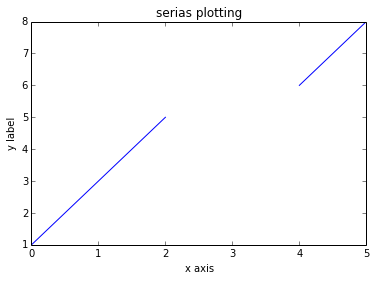

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.title("serias plotting ")
plt.xlabel("x axis")
plt.ylabel("y label")
s.plot();

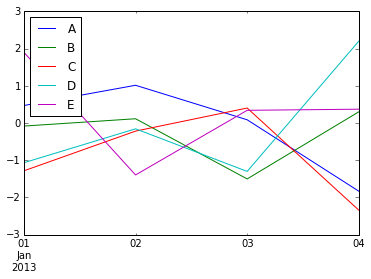

In [18]:
df.plot();

In [10]:
df1=df.pivot(index= 'Loan_ID', columns='Education', values='ApplicantIncome')
df1.head()

Education,Graduate,Not Graduate
Loan_ID,,
LP001002,5849.0,NaN
LP001003,4583.0,NaN
LP001005,3000.0,NaN
LP001006,NaN,2583.0
LP001008,6000.0,NaN


In [29]:
#df.groupby('col'|['cols'],as_index=False).mean()
group=df.groupby(['Gender','Education'])
group.describe()

ApplicantIncome                                            \
                              count         mean          std     min     25%   
Gender Education                                                                
Female Graduate                92.0  4646.467391  3317.369895   416.0  2894.0   
       Not Graduate            20.0  4629.700000  4732.008432   210.0  2102.5   
Male   Graduate               376.0  5992.345745  6921.455587   150.0  3032.0   
       Not Graduate           113.0  3630.061947  1411.070435  1442.0  2600.0   

                                             CoapplicantIncome               \
                        50%     75%      max             count         mean   
Gender Education                                                              
Female Graduate      3638.5  4622.5  19484.0              92.0  1231.206522   
       Not Graduate  3208.5  4457.5  18165.0              20.0   541.300000   
Male   Graduate      4166.0  6250.0  81000.0             376.0  1845.691277   
       Not Graduate  3357.0  4288.0   7667.0             113.0  1401.008850   

                     ...   LoanAmount        Loan_Amount_Term              \
                     ...          75%    max            count        mean   
Gender Education     ...                                                    
Female Graduate      ...       138.75  600.0             91.0  350.769231   
       Not Graduate  ...       128.50  225.0             18.0  360.000000   
Male   Graduate      ...       184.50  650.0            369.0  343.317073   
       Not Graduate  ...       134.00  279.0            109.0  327.302752   

                                                                   
                           std    min    25%    50%    75%    max  
Gender Education                                                   
Female Graduate      62.021336   36.0  360.0  360.0  360.0  480.0  
       Not Graduate   0.000000  360.0  360.0  360.0  360.0  360.0  
Male   Graduate      61.417404   12.0  360.0  360.0  360.0  480.0  
       Not Graduate  82.621572   36.0  360.0  360.0  360.0  480.0  

[4 rows x 40 columns]

In [30]:
group.size()

Gender  Education   
Female  Graduate         92
        Not Graduate     20
Male    Graduate        376
        Not Graduate    113
dtype: int64

In [26]:
#gen sample Data set
import numpy as np
from random import sample
rindex = np.array(sample(range(len(df)), 3))
sample = df.iloc[rindex]
sample

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
43,LP001131,Male,Yes,0,Graduate,No,3941,2336.0,134.0,360.0,1.0,Semiurban,Y
431,LP002379,Male,No,0,Graduate,No,6500,0.0,105.0,360.0,0.0,Rural,N
218,LP001732,Male,Yes,2,Graduate,NaN,5000,0.0,72.0,360.0,0.0,Semiurban,N


In [28]:
#drop_duplicates
rem_dup=df.drop_duplicates(['Gender', 'Education'])
rem_dup

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
17,LP001036,Female,No,0,Graduate,No,3510,0.0,76.0,360.0,0.0,Urban,N
23,LP001050,NaN,Yes,2,Not Graduate,No,3365,1917.0,112.0,360.0,0.0,Rural,N
50,LP001155,Female,Yes,0,Not Graduate,No,1928,1644.0,100.0,360.0,1.0,Semiurban,Y
126,LP001448,NaN,Yes,3+,Graduate,No,23803,0.0,370.0,360.0,1.0,Rural,Y


In [33]:
df.isnull()
df.isnull().any()

Loan_ID              False
Gender                True
Married               True
Dependents            True
Education            False
Self_Employed         True
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount            True
Loan_Amount_Term      True
Credit_History        True
Property_Area        False
Loan_Status          False
dtype: bool

In [ ]:
#df.fillna(value,method='ffill|bfill' ,inplace=True|False)

In [8]:
#join two dataframes return new df, left_on:left side col, right_index:right side use index to join
#df1.merge(df2,how=['inner|left|right'],on=['cols'],left_on=[],right_on=[],right_index=True|False)

In [ ]:
df.corr()

In [ ]:
df.month = pd.to_datetime(df.month)

In [ ]:
df.set_index('month', inplace=True)

In [ ]:
#drop all Nan rows default,axis=1 drop columns
#df.dropna([subset='col'],how=['any'|'all'])
#drop column return dropped column
se_score = df.pop('score')
#delete columns
del df['col']
#select by dtypes
df.select_dtypes(exclude=['object'])

In [ ]:
# axis=1 align 2 df by columns
#one_hot_encoded_training_predictors.align(one_hot_encoded_test_predictors,join='left', axis=1)

In [ ]:
#normalize by devide by first row to compare diff dataset
df/df.ix[0,:]

In [ ]:
#daily return (p[t]/p[t-1])-1
#mean of daily return indicates totals trends
daily_returns=(df/df.shift(1))-1
#method 2
#daily_returns=df.copy()
#daily_returns[1:]=(df[1:]/df[:-1].values)-1
daily_returns.ix[0,:]=0

In [ ]:
#Cumulative Returns (p[t]/p[0])-1


In [ ]:
#sharp ratio ,evaluate return with risk
#risk free rate =(LIBOR,3month 债券利率,0,用年利率计算)
#k=sample frequency per year, daily=sqrt(年交易天数＝252), weekly=sqrt(52), monthly=sqrt(12)
sqrt(252)*mean(daily_return-daily_rfr)/std(daily_return-daily_rfr)